In [24]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Load dataset
df = pd.read_csv("BitcoinHeistData.csv")  # Change to your actual dataset filename

# Drop unnecessary columns (year, day, address)
df = df.drop(columns=["year", "day", "address"])

# Convert all ransomware families into a single "ransomware" class
df["label"] = df["label"].apply(lambda x: 0 if x == "white" else 1)

# Check class distribution before balancing
print("Class distribution before balancing:", Counter(df["label"]))


Class distribution before balancing: Counter({0: 2875284, 1: 41413})


In [25]:
# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Apply SMOTE only to the ransomware class (label = 1)
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Generates ransomware samples up to 50% of white samples
X_smote, y_smote = smote.fit_resample(X, y)

# Convert back to DataFrame
df_balanced = pd.DataFrame(X_smote, columns=X.columns)
df_balanced["label"] = y_smote

# Check final class distribution
print("Final class distribution after balancing:", Counter(df_balanced["label"]))


Final class distribution after balancing: Counter({0: 2875284, 1: 1437642})


In [26]:
# Separate white and ransomware transactions
df_white = df_balanced[df_balanced["label"] == 0]
df_ransomware = df_balanced[df_balanced["label"] == 1]

# Downsample white transactions to match ransomware count
target_white_count = len(df_ransomware)
df_white_downsampled = resample(df_white, replace=False, n_samples=target_white_count, random_state=42)

# Combine downsampled white transactions with ransomware transactions
df_final = pd.concat([df_white_downsampled, df_ransomware])

# Shuffle dataset
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

# Check final class distribution
print("Final class distribution after downsampling:", Counter(df_final["label"]))


Final class distribution after downsampling: Counter({1: 1437642, 0: 1437642})


In [27]:
# Check basic statistics
print(df_final.describe())


             length        weight         count        looped     neighbors  \
count  2.875284e+06  2.875284e+06  2.875284e+06  2.875284e+06  2.875284e+06   
mean   4.277486e+01  5.813505e-01  6.523610e+02  1.641565e+02  2.048107e+00   
std    5.654368e+01  3.115618e+00  1.522973e+03  7.602808e+02  1.444961e+01   
min    0.000000e+00  3.606469e-94  1.000000e+00  0.000000e+00  1.000000e+00   
25%    2.000000e+00  5.632553e-02  1.000000e+00  0.000000e+00  1.000000e+00   
50%    8.000000e+00  3.522538e-01  1.000000e+00  0.000000e+00  2.000000e+00   
75%    8.300000e+01  8.782332e-01  2.050000e+02  0.000000e+00  2.000000e+00   
max    1.440000e+02  1.943749e+03  1.449600e+04  1.449600e+04  1.292000e+04   

             income      label  
count  2.875284e+06  2875284.0  
mean   2.646795e+09        0.5  
std    1.164391e+11        0.5  
min    3.000000e+07        0.0  
25%    8.000000e+07        0.0  
50%    1.574365e+08        0.5  
75%    5.000000e+08        1.0  
max    4.996440e+13     

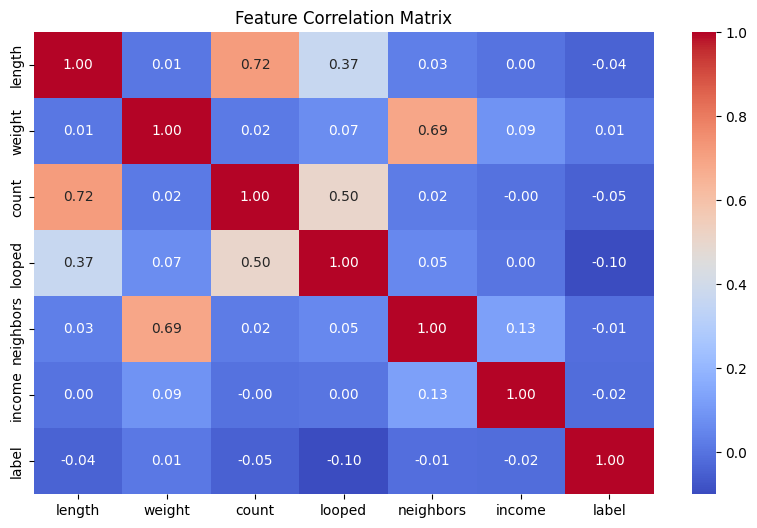

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_final.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [29]:
# Check for missing values
print("Missing values in dataset:")
print(df_final.isnull().sum())


Missing values in dataset:
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64


In [30]:
# Verify final distribution again
print("Final class distribution:", Counter(df_final["label"]))


Final class distribution: Counter({1: 1437642, 0: 1437642})


In [31]:
df_final.to_csv("balanced_data1.csv", index=False)
print("Dataset saved as balanced_data.csv")

Dataset saved as balanced_data.csv
